In [14]:
# Import library dasar
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import cv2
from PIL import Image
import os

# Membuat Folder
os.makedirs("handwritten", exist_ok=True)
# Cek versi TensorFlow
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.19.0


In [15]:
# Load dataset MNIST
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Tampilkan informasi dataset
print("INFORMASI DATASET MNIST")
print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Testing data shape: {X_test.shape}")
print(f"Testing labels shape: {y_test.shape}")
print(f"Pixel value range: {X_train.min()} - {X_train.max()}")
print(f"Number of classes: {len(np.unique(y_train))}")

INFORMASI DATASET MNIST
Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Testing data shape: (10000, 28, 28)
Testing labels shape: (10000,)
Pixel value range: 0 - 255
Number of classes: 10


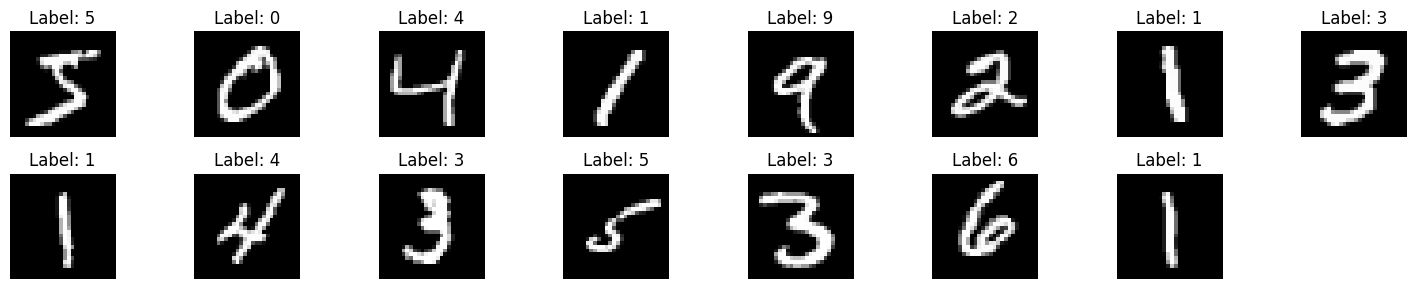

In [16]:
# Visualisasi 15 contoh gambar dari dataset
plt.figure(figsize=(15, 3))
for i in range(15):
    plt.subplot(2, 8, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_original_samples.png', dpi=150, bbox_inches='tight')
plt.show()

In [17]:
# Normalisasi pixel values ke range [0, 1]
X_train_normalized = X_train.astype('float32') / 255.0
X_test_normalized = X_test.astype('float32') / 255.0

print(f"Setelah normalisasi:")
print(f"Training pixel range: {X_train_normalized.min():.2f} - {X_train_normalized.max():.2f}")
print(f"Testing pixel range: {X_test_normalized.min():.2f} - {X_test_normalized.max():.2f}")

Setelah normalisasi:
Training pixel range: 0.00 - 1.00
Testing pixel range: 0.00 - 1.00


In [18]:
# Reshape: tambahkan dimensi channel (grayscale = 1 channel)
X_train_reshaped = X_train_normalized.reshape(-1, 28, 28, 1)
X_test_reshaped = X_test_normalized.reshape(-1, 28, 28, 1)

print(f"\nSetelah reshape:")
print(f"Training shape: {X_train_reshaped.shape}")
print(f"Testing shape: {X_test_reshaped.shape}")


Setelah reshape:
Training shape: (60000, 28, 28, 1)
Testing shape: (10000, 28, 28, 1)


In [19]:
# Convert labels ke one-hot encoding
y_train_categorical = to_categorical(y_train, 10)
y_test_categorical = to_categorical(y_test, 10)

print(f"\nSetelah one-hot encoding:")
print(f"Training labels shape: {y_train_categorical.shape}")
print(f"Testing labels shape: {y_test_categorical.shape}")
print(f"Contoh label asli: {y_train[0]} -> One-hot: {y_train_categorical[0]}")


Setelah one-hot encoding:
Training labels shape: (60000, 10)
Testing labels shape: (10000, 10)
Contoh label asli: 5 -> One-hot: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


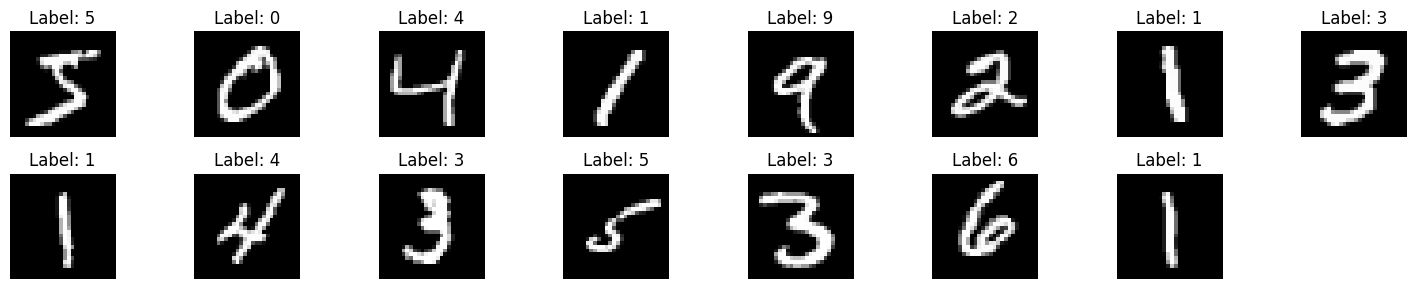


 Pra-pemrosesan data MNIST selesai!


In [20]:
# Visualisasi data setelah preprocessing
plt.figure(figsize=(15, 3))
for i in range(15):
    plt.subplot(2, 8, i+1)
    # Reshape kembali untuk visualisasi (hilangkan channel dimension)
    plt.imshow(X_train_reshaped[i].reshape(28, 28), cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.savefig('mnist_preprocessed_samples.png', dpi=150, bbox_inches='tight')
plt.show()

print("\n Pra-pemrosesan data MNIST selesai!")

In [21]:
# Buat model CNN dari nol
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

def create_cnn_model():
    model = Sequential([
        # Convolutional Block 1
        Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Block 2
        Conv2D(64, kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),

        # Convolutional Block 3 (opsional, untuk model lebih dalam)
        Conv2D(64, kernel_size=(3, 3), activation='relu'),

        # Flatten
        Flatten(),

        # Fully Connected Layers
        Dense(128, activation='relu'),
        Dropout(0.5),  # Regularisasi untuk mencegah overfitting

        # Output Layer
        Dense(10, activation='softmax')
    ])

    return model

# Buat model
model_a = create_cnn_model()

# Tampilkan summary model
print("MODEL A: CNN DARI NOL")
model_a.summary()

MODEL A: CNN DARI NOL


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 130,890 (511.29 KB)

 Trainable params: 130,890 (511.29 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
# Compile model
model_a.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n Model berhasil di-compile!")


 Model berhasil di-compile!


In [23]:
# Training model dengan validation split
print("MEMULAI TRAINING MODEL A...")

history_a = model_a.fit(
    X_train_reshaped,
    y_train_categorical,
    batch_size=128,
    epochs=15,  # Anda bisa sesuaikan (10-20 epoch)
    validation_split=0.2,  # 20% data training untuk validasi
    verbose=1
)

print("\n✓ Training selesai!")

MEMULAI TRAINING MODEL A...
Epoch 1/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 54s 141ms/step - accuracy: 0.7628 - loss: 0.7232 - val_accuracy: 0.9752 - val_loss: 0.0792
Epoch 2/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 151ms/step - accuracy: 0.9690 - loss: 0.1061 - val_accuracy: 0.9847 - val_loss: 0.0504
Epoch 3/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 85s 158ms/step - accuracy: 0.9798 - loss: 0.0636 - val_accuracy: 0.9845 - val_loss: 0.0524
Epoch 4/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 76s 142ms/step - accuracy: 0.9843 - loss: 0.0527 - val_accuracy: 0.9889 - val_loss: 0.0392
Epoch 5/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 46s 124ms/step - accuracy: 0.9871 - loss: 0.0418 - val_accuracy: 0.9888 - val_loss: 0.0384
Epoch 6/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 108ms/step - accuracy: 0.9892 - loss: 0.0338 - val_accuracy: 0.9895 - val_loss: 0.0385
Epoch 7/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 111ms/step - accuracy: 0.9917 - loss: 0.0288 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 8/15
375/375 ━━━━━━━━━━━━━━━━━━━━ 82s 111ms/step 

In [24]:
# Evaluasi model pada test set
print("EVALUASI MODEL A PADA TEST SET MNIST : ")

test_loss, test_accuracy = model_a.evaluate(X_test_reshaped, y_test_categorical, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy*100:.2f}%")

EVALUASI MODEL A PADA TEST SET MNIST : 
Test Loss: 0.0355
Test Accuracy: 99.08%


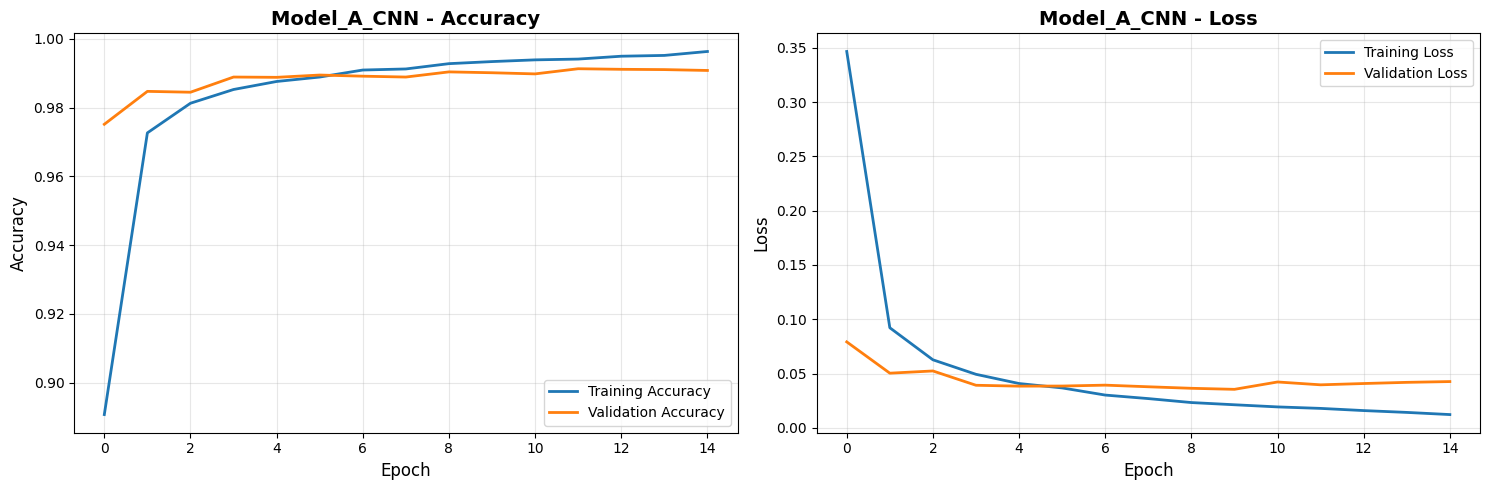

In [25]:
# Plot training history
def plot_training_history(history, model_name):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Plot Accuracy
    axes[0].plot(history.history['accuracy'], label='Training Accuracy', linewidth=2)
    axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2)
    axes[0].set_title(f'{model_name} - Accuracy', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Epoch', fontsize=12)
    axes[0].set_ylabel('Accuracy', fontsize=12)
    axes[0].legend(fontsize=10)
    axes[0].grid(True, alpha=0.3)

    # Plot Loss
    axes[1].plot(history.history['loss'], label='Training Loss', linewidth=2)
    axes[1].plot(history.history['val_loss'], label='Validation Loss', linewidth=2)
    axes[1].set_title(f'{model_name} - Loss', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Epoch', fontsize=12)
    axes[1].set_ylabel('Loss', fontsize=12)
    axes[1].legend(fontsize=10)
    axes[1].grid(True, alpha=0.3)

    plt.tight_layout()
    plt.savefig(f'{model_name}_training_history.png', dpi=150, bbox_inches='tight')
    plt.show()

# Plot history Model A
plot_training_history(history_a, 'Model_A_CNN')

In [33]:
# Save model untuk digunakan nanti
model_a.save('model_a_cnn.h5')
print("\n Model A berhasil disimpan sebagai 'model_a_cnn.h5'")


 Model A berhasil disimpan sebagai 'model_a_cnn.h5'


In [34]:
# Identifikasi 3 Digit Terakhir NIM
nim = "202332134"
tiga_digit_terakhir = nim[-3:]

print("IDENTIFIKASI DIGIT DARI NIM :")
print(f"NIM : {nim}")
print(f"3 Digit terakhir : {tiga_digit_terakhir}")


IDENTIFIKASI DIGIT DARI NIM :
NIM : 202332134
3 Digit terakhir : 134


In [35]:
import os
from glob import glob

# Path ke folder tulisan tangan
handwritten_folder = 'handwritten/'  # Sesuaikan jika berbeda

# Cek jumlah file
image_files = glob(os.path.join(handwritten_folder, '*.jpg')) + \
              glob(os.path.join(handwritten_folder, '*.png')) + \
              glob(os.path.join(handwritten_folder, '*.jpeg'))

print("CEK FILE TULISAN TANGAN")
print(f"Jumlah file gambar: {len(image_files)}")

if len(image_files) < 30:
    print(f"\n WARNING: Hanya ada {len(image_files)} gambar, seharusnya 30!")
elif len(image_files) == 30:
    print(f"\n Jumlah gambar sudah sesuai (30 gambar)")
else:
    print(f"\n WARNING: Ada {len(image_files)} gambar, seharusnya hanya 30!")

CEK FILE TULISAN TANGAN
Jumlah file gambar: 30

 Jumlah gambar sudah sesuai (30 gambar)


In [37]:
from google.colab import files
import os

# Mengunggah file
uploaded = files.upload()

# Memastikan folder 'handwritten' ada
os.makedirs("handwritten", exist_ok=True)

print("File berhasil diunggah:")
for filename in uploaded.keys():
    print(f'- {filename}')
    # Pindahkan file yang diunggah ke folder 'handwritten'
    os.rename(filename, os.path.join('handwritten', filename))
    print(f'  Dipindahkan ke: handwritten/{filename}')

print('\nPastikan mengunggah 30 gambar tulisan tangan.')

Saving digit1_01.jpg to digit1_01.jpg
Saving digit1_02.jpg to digit1_02.jpg
Saving digit1_03.jpg to digit1_03.jpg
Saving digit1_04.jpg to digit1_04.jpg
Saving digit1_05.jpg to digit1_05.jpg
Saving digit1_06.jpg to digit1_06.jpg
Saving digit1_07.jpg to digit1_07.jpg
Saving digit1_08.jpg to digit1_08.jpg
Saving digit1_09.jpg to digit1_09.jpg
Saving digit1_10.jpg to digit1_10.jpg
Saving digit3_01.jpg to digit3_01.jpg
Saving digit3_02.jpg to digit3_02.jpg
Saving digit3_03.jpg to digit3_03.jpg
Saving digit3_04.jpg to digit3_04.jpg
Saving digit3_05.jpg to digit3_05.jpg
Saving digit3_06.jpg to digit3_06.jpg
Saving digit3_07.jpg to digit3_07.jpg
Saving digit3_08.jpg to digit3_08.jpg
Saving digit3_09.jpg to digit3_09.jpg
Saving digit3_10.jpg to digit3_10.jpg
Saving digit4_01.jpg to digit4_01.jpg
Saving digit4_02.jpg to digit4_02.jpg
Saving digit4_03.jpg to digit4_03.jpg
Saving digit4_04.jpg to digit4_04.jpg
Saving digit4_05.jpg to digit4_05.jpg
Saving digit4_06.jpg to digit4_06.jpg
Saving digit


Visualisasi proses preprocessing:


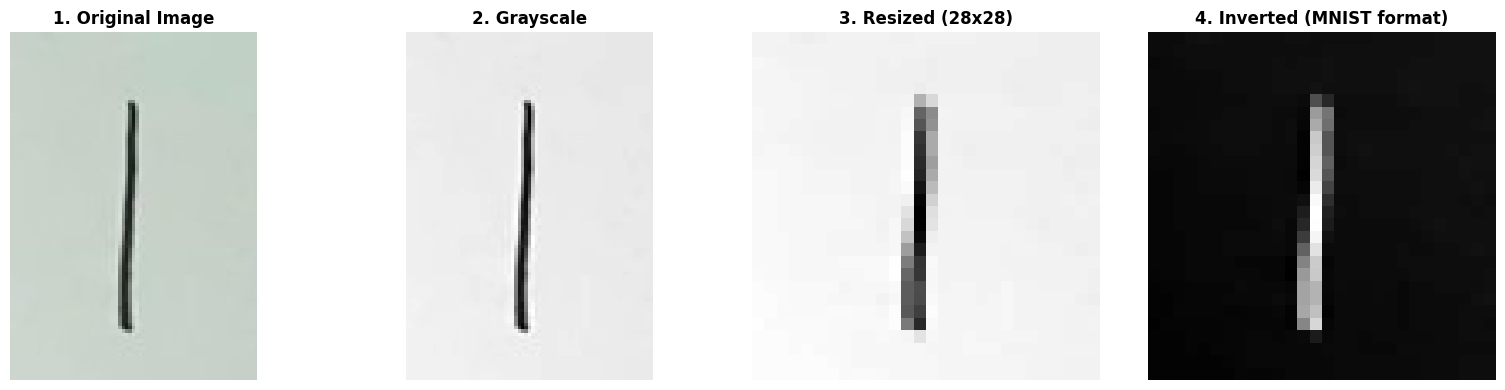

In [38]:
# Visualisasi step-by-step preprocessing untuk 1 gambar
def visualize_preprocessing_steps(image_path):
    # Original
    img_original = cv2.imread(image_path)
    img_original_rgb = cv2.cvtColor(img_original, cv2.COLOR_BGR2RGB)

    # Grayscale
    gray = cv2.cvtColor(img_original, cv2.COLOR_BGR2GRAY)

    # Resize
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

    # Invert
    inverted = 255 - resized

    # Plot
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    axes[0].imshow(img_original_rgb)
    axes[0].set_title('1. Original Image', fontsize=12, fontweight='bold')
    axes[0].axis('off')

    axes[1].imshow(gray, cmap='gray')
    axes[1].set_title('2. Grayscale', fontsize=12, fontweight='bold')
    axes[1].axis('off')

    axes[2].imshow(resized, cmap='gray')
    axes[2].set_title('3. Resized (28x28)', fontsize=12, fontweight='bold')
    axes[2].axis('off')

    axes[3].imshow(inverted, cmap='gray')
    axes[3].set_title('4. Inverted (MNIST format)', fontsize=12, fontweight='bold')
    axes[3].axis('off')

    plt.tight_layout()
    plt.savefig('preprocessing_steps_example.png', dpi=150, bbox_inches='tight')
    plt.show()

# Visualisasi dengan 1 contoh gambar
print("\nVisualisasi proses preprocessing:")
visualize_preprocessing_steps(sorted(image_files)[0])

In [39]:
# 3 digit terakhir NIM Saya
nim_digits = [1, 3, 4]

# Preprocessing semua gambar
X_handwritten = []
y_handwritten = []

# Urutkan file berdasarkan nama
sorted_files = sorted(image_files)

print("PREPROCESSING SEMUA TULISAN TANGAN")

for idx, image_path in enumerate(sorted_files):
    # Preprocess
    processed_img, _ = preprocess_handwritten_image(image_path)
    X_handwritten.append(processed_img)

    # Tentukan label berdasarkan urutan
    # Gambar 1-10: digit pertama
    # Gambar 11-20: digit kedua
    # Gambar 21-30: digit ketiga
    if idx < 10:
        label = nim_digits[0]
    elif idx < 20:
        label = nim_digits[1]
    else:
        label = nim_digits[2]

    y_handwritten.append(label)

    print(f"  [{idx+1:2d}/30] {os.path.basename(image_path):25s} -> Label: {label}")

# Convert to numpy array
X_handwritten = np.array(X_handwritten)
y_handwritten = np.array(y_handwritten)

print(" ")
print("HASIL PREPROCESSING")
print(f"Shape X_handwritten: {X_handwritten.shape}")
print(f"Shape y_handwritten: {y_handwritten.shape}")
print(f"Distribusi label:")
unique, counts = np.unique(y_handwritten, return_counts=True)
for digit, count in zip(unique, counts):
    print(f"  Digit {digit}: {count} gambar")

print("\n Preprocessing selesai!")

PREPROCESSING SEMUA TULISAN TANGAN
  [ 1/30] digit1_01.jpg             -> Label: 1
  [ 2/30] digit1_02.jpg             -> Label: 1
  [ 3/30] digit1_03.jpg             -> Label: 1
  [ 4/30] digit1_04.jpg             -> Label: 1
  [ 5/30] digit1_05.jpg             -> Label: 1
  [ 6/30] digit1_06.jpg             -> Label: 1
  [ 7/30] digit1_07.jpg             -> Label: 1
  [ 8/30] digit1_08.jpg             -> Label: 1
  [ 9/30] digit1_09.jpg             -> Label: 1
  [10/30] digit1_10.jpg             -> Label: 1
  [11/30] digit3_01.jpg             -> Label: 3
  [12/30] digit3_02.jpg             -> Label: 3
  [13/30] digit3_03.jpg             -> Label: 3
  [14/30] digit3_04.jpg             -> Label: 3
  [15/30] digit3_05.jpg             -> Label: 3
  [16/30] digit3_06.jpg             -> Label: 3
  [17/30] digit3_07.jpg             -> Label: 3
  [18/30] digit3_08.jpg             -> Label: 3
  [19/30] digit3_09.jpg             -> Label: 3
  [20/30] digit3_10.jpg             -> Label: 3
  [21


Visualisasi 5 contoh tulisan tangan setelah preprocessing:


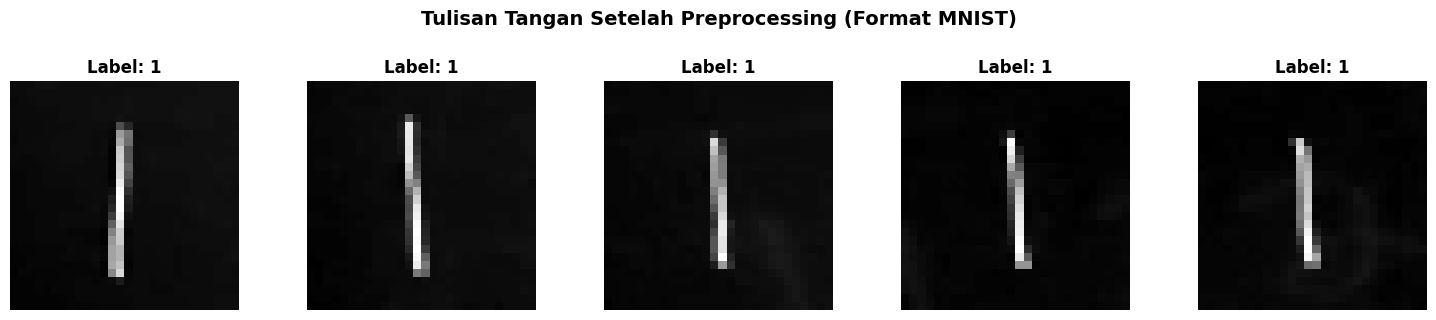

In [40]:
# Visualisasi beberapa contoh tulisan tangan setelah preprocessing
def visualize_preprocessed_samples(X_data, y_data, num_samples=5):
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))

    for i in range(num_samples):
        axes[i].imshow(X_data[i].reshape(28, 28), cmap='gray')
        axes[i].set_title(f'Label: {y_data[i]}', fontsize=12, fontweight='bold')
        axes[i].axis('off')

    plt.suptitle('Tulisan Tangan Setelah Preprocessing (Format MNIST)',
                 fontsize=14, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.savefig('handwritten_preprocessed_samples.png', dpi=150, bbox_inches='tight')
    plt.show()

# Visualisasi 5 contoh
print("\nVisualisasi 5 contoh tulisan tangan setelah preprocessing:")
visualize_preprocessed_samples(X_handwritten, y_handwritten, num_samples=5)

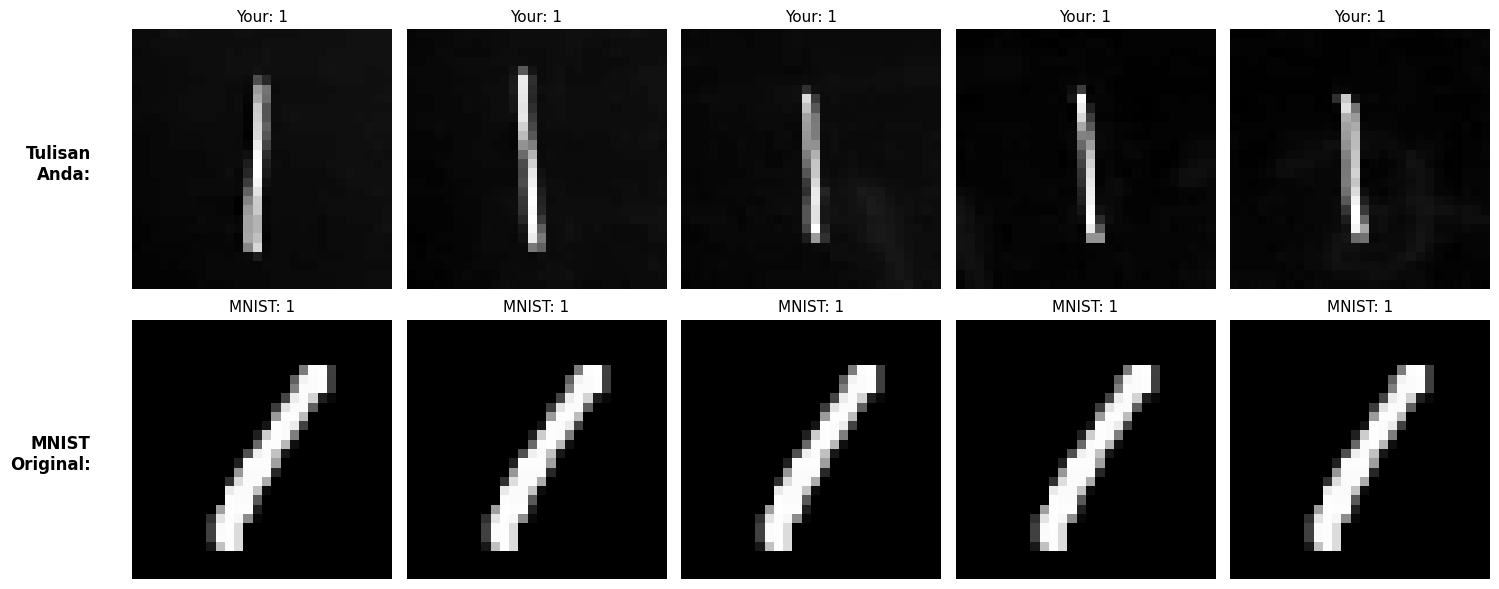

In [41]:
# Bandingkan tulisan tangan dengan MNIST
fig, axes = plt.subplots(2, 5, figsize=(15, 6))

# Baris 1: Tulisan tangan
for i in range(5):
    axes[0, i].imshow(X_handwritten[i].reshape(28, 28), cmap='gray')
    axes[0, i].set_title(f'Your: {y_handwritten[i]}', fontsize=11)
    axes[0, i].axis('off')

# Baris 2: MNIST asli dengan digit yang sama
for i in range(5):
    # Cari gambar MNIST dengan label yang sama
    digit_to_find = y_handwritten[i]
    mnist_idx = np.where(y_train == digit_to_find)[0][0]

    axes[1, i].imshow(X_train_reshaped[mnist_idx].reshape(28, 28), cmap='gray')
    axes[1, i].set_title(f'MNIST: {digit_to_find}', fontsize=11)
    axes[1, i].axis('off')

axes[0, 0].text(-5, 14, 'Tulisan\nAnda:', fontsize=12, fontweight='bold',
                ha='right', va='center', rotation=0)
axes[1, 0].text(-5, 14, 'MNIST\nOriginal:', fontsize=12, fontweight='bold',
                ha='right', va='center', rotation=0)

plt.tight_layout()
plt.savefig('comparison_handwritten_vs_mnist.png', dpi=150, bbox_inches='tight')
plt.show()

In [68]:
def preprocess_handwritten_image(image_path):

    # 1. Load image
    img = cv2.imread(image_path)

    # 2. Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # 3. Resize to 28x28
    resized = cv2.resize(gray, (28, 28), interpolation=cv2.INTER_AREA)

    # 4. Invert colors (karena MNIST background hitam, digit putih)
    # Jika tulisan Anda hitam di background putih, perlu di-invert
    inverted = 255 - resized

    # 5. Normalize to [0, 1]
    normalized = inverted.astype('float32') / 255.0

    # 6. Reshape for CNN input (28, 28, 1)
    reshaped = normalized.reshape(28, 28, 1)

    return reshaped, normalized  # Return both untuk visualisasi


# Test fungsi dengan 1 gambar
test_image = sorted(image_files)[0]
processed_img, processed_for_viz = preprocess_handwritten_image(test_image)

print("\n Fungsi preprocessing berhasil dibuat!")
print(f"Output shape: {processed_img.shape}")
print(f"Pixel range: {processed_img.min():.3f} - {processed_img.max():.3f}")


 Fungsi preprocessing berhasil dibuat!
Output shape: (28, 28, 1)
Pixel range: 0.169 - 0.757


In [42]:

print("PREDIKSI MENGGUNAKAN MODEL A (CNN dari Nol)")

# Prediksi
predictions_a = model_a.predict(X_handwritten, verbose=0)
predicted_labels_a = np.argmax(predictions_a, axis=1)

# Hitung accuracy
correct_predictions = np.sum(predicted_labels_a == y_handwritten)
accuracy_a = (correct_predictions / len(y_handwritten)) * 100

print(f"\nHasil Prediksi:")
print(f"  Benar: {correct_predictions}/{len(y_handwritten)}")
print(f"  Salah: {len(y_handwritten) - correct_predictions}/{len(y_handwritten)}")
print(f"  Accuracy: {accuracy_a:.2f}%")

PREDIKSI MENGGUNAKAN MODEL A (CNN dari Nol)

Hasil Prediksi:
  Benar: 26/30
  Salah: 4/30
  Accuracy: 86.67%


In [43]:
# Buat tabel hasil prediksi
print("DETAIL HASIL PREDIKSI MODEL A")
print(f"{'No':<4} {'File':<30} {'Label Asli':<12} {'Prediksi':<10} {'Status':<8} {'Confidence':<12}")

for i in range(len(y_handwritten)):
    filename = os.path.basename(sorted_files[i])
    true_label = y_handwritten[i]
    pred_label = predicted_labels_a[i]
    status = "Benar" if pred_label == true_label else "Salah"
    confidence = predictions_a[i][pred_label] * 100

    print(f"{i+1:<4} {filename:<30} {true_label:<12} {pred_label:<10} {status:<8} {confidence:>6.2f}%")

print(f"{'TOTAL':<36} {'ACCURACY:':<12} {accuracy_a:>6.2f}%")

DETAIL HASIL PREDIKSI MODEL A
No   File                           Label Asli   Prediksi   Status   Confidence  
1    digit1_01.jpg                  1            1          Benar     99.82%
2    digit1_02.jpg                  1            1          Benar     99.97%
3    digit1_03.jpg                  1            1          Benar     99.35%
4    digit1_04.jpg                  1            1          Benar     99.43%
5    digit1_05.jpg                  1            1          Benar     99.80%
6    digit1_06.jpg                  1            1          Benar     98.94%
7    digit1_07.jpg                  1            1          Benar     99.98%
8    digit1_08.jpg                  1            1          Benar     99.94%
9    digit1_09.jpg                  1            1          Benar     99.92%
10   digit1_10.jpg                  1            1          Benar     99.94%
11   digit3_01.jpg                  3            3          Benar    100.00%
12   digit3_02.jpg                  3    

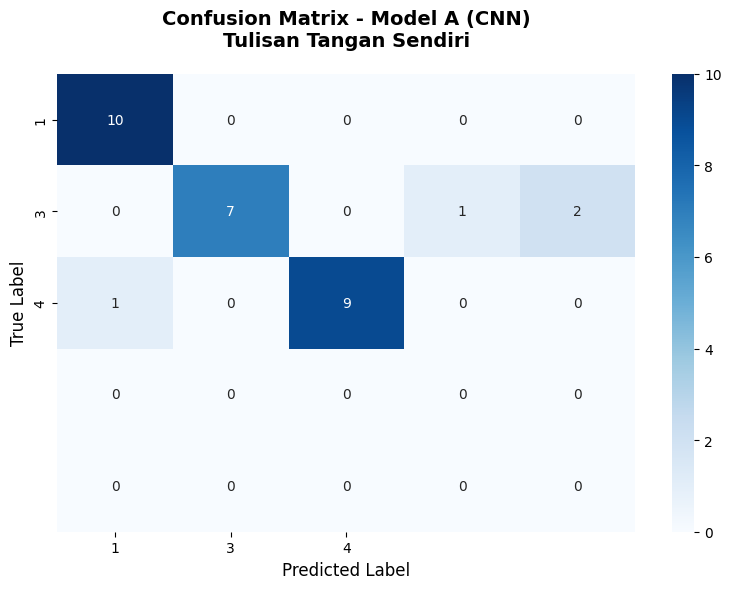


Classification Report - Model A:
              precision    recall  f1-score   support

           1       0.91      1.00      0.95        10
           3       1.00      0.70      0.82        10
           4       1.00      0.90      0.95        10
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.87        30
   macro avg       0.58      0.52      0.54        30
weighted avg       0.97      0.87      0.91        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [44]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Hitung confusion matrix
cm_a = confusion_matrix(y_handwritten, predicted_labels_a)

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_a, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(y_handwritten),
            yticklabels=np.unique(y_handwritten))
plt.title('Confusion Matrix - Model A (CNN)\nTulisan Tangan Sendiri',
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_model_a.png', dpi=150, bbox_inches='tight')
plt.show()

# Classification report
print("\nClassification Report - Model A:")
# Get all unique labels from both true and predicted values
all_labels = np.union1d(np.unique(y_handwritten), np.unique(predicted_labels_a))
print(classification_report(y_handwritten, predicted_labels_a,
                           labels=all_labels, # Explicitly specify all labels
                           target_names=[str(d) for d in all_labels]))

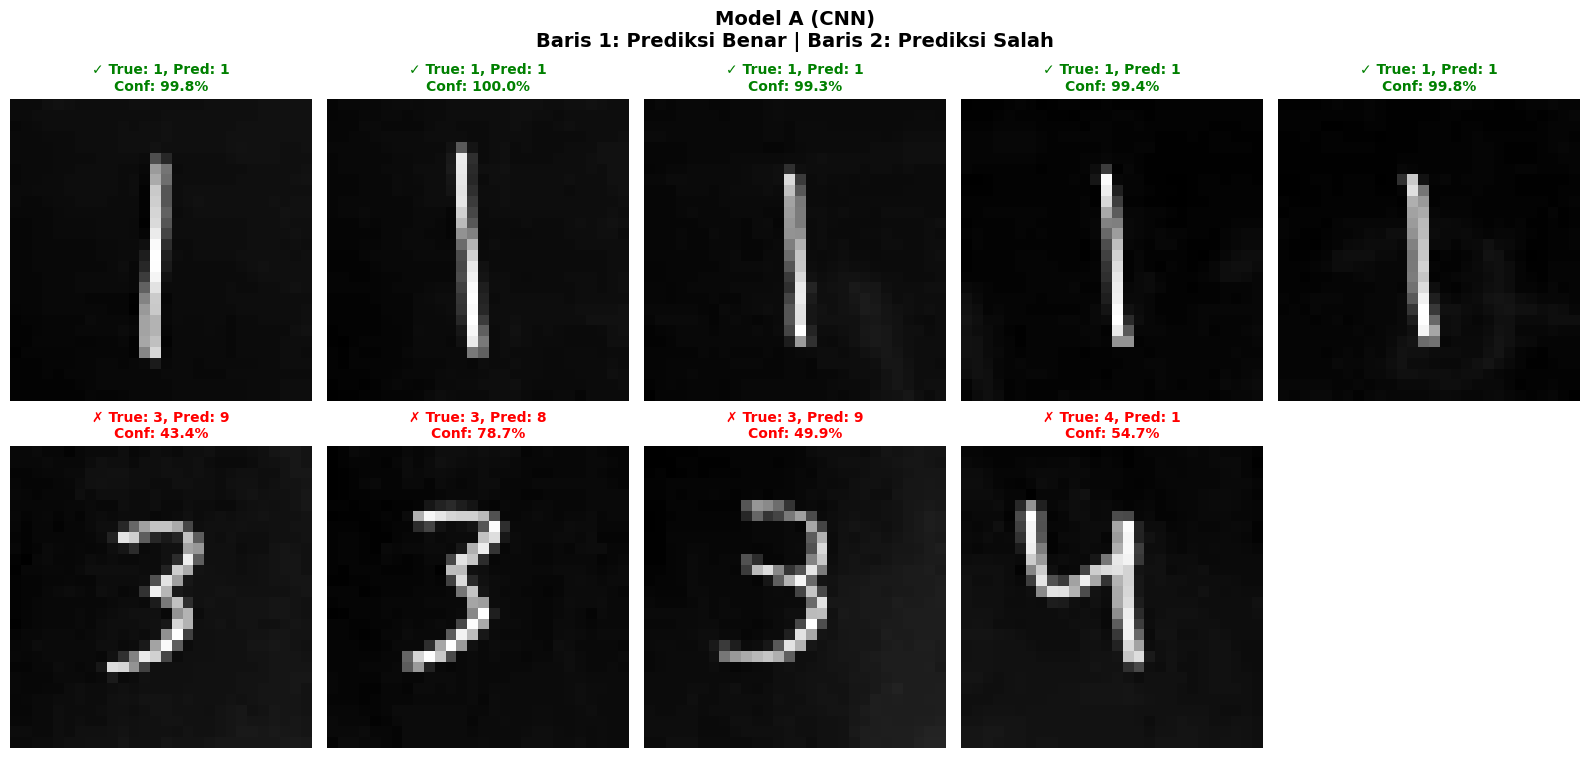

In [45]:
# Visualisasi prediksi yang benar dan salah
def visualize_predictions(X_data, y_true, y_pred, predictions_proba, title):
    # Pisahkan prediksi benar dan salah
    correct_idx = np.where(y_pred == y_true)[0]
    wrong_idx = np.where(y_pred != y_true)[0]

    fig = plt.figure(figsize=(16, 8))

    # Plot prediksi benar (maksimal 5)
    num_correct = min(5, len(correct_idx))
    for i in range(num_correct):
        idx = correct_idx[i]
        plt.subplot(2, 5, i+1)
        plt.imshow(X_data[idx].reshape(28, 28), cmap='gray')
        confidence = predictions_proba[idx][y_pred[idx]] * 100
        plt.title(f'✓ True: {y_true[idx]}, Pred: {y_pred[idx]}\nConf: {confidence:.1f}%',
                 fontsize=10, color='green', fontweight='bold')
        plt.axis('off')

    # Plot prediksi salah (maksimal 5)
    num_wrong = min(5, len(wrong_idx))
    for i in range(num_wrong):
        idx = wrong_idx[i]
        plt.subplot(2, 5, i+6)
        plt.imshow(X_data[idx].reshape(28, 28), cmap='gray')
        confidence = predictions_proba[idx][y_pred[idx]] * 100
        plt.title(f'✗ True: {y_true[idx]}, Pred: {y_pred[idx]}\nConf: {confidence:.1f}%',
                 fontsize=10, color='red', fontweight='bold')
        plt.axis('off')

    plt.suptitle(f'{title}\nBaris 1: Prediksi Benar | Baris 2: Prediksi Salah',
                fontsize=14, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.savefig(f'{title.replace(" ", "_")}_predictions_viz.png', dpi=150, bbox_inches='tight')
    plt.show()

# Visualisasi untuk Model A
visualize_predictions(X_handwritten, y_handwritten, predicted_labels_a,
                     predictions_a, 'Model A (CNN)')

In [46]:
# Convert MNIST dari grayscale (1 channel) ke RGB (3 channels) dan resize
def preprocess_for_transfer_learning(X_data, target_size=(32, 32)):
    """
    Convert grayscale images (28, 28, 1) to RGB (target_size, target_size, 3)
    dengan cara replikasi channel dan resizing.
    """
    # Resize images
    # X_data is expected to be (N, H, W, 1)
    resized_images = tf.image.resize(X_data, target_size, method=tf.image.ResizeMethod.BILINEAR).numpy()

    # Repeat channel 3x untuk simulasi RGB
    # resized_images is now (N, target_size[0], target_size[1], 1)
    X_rgb = np.repeat(resized_images, 3, axis=-1)

    # Normalize to [0, 1] if not already (important for pre-trained models)
    if X_rgb.max() > 1.0:
        X_rgb = X_rgb.astype('float32') / 255.0

    return X_rgb

print("KONVERSI DAN RESIZE DATA UNTUK TRANSFER LEARNING :")

# Convert training dan testing data
X_train_rgb = preprocess_for_transfer_learning(X_train_reshaped)
X_test_rgb = preprocess_for_transfer_learning(X_test_reshaped)

# Convert tulisan tangan
X_handwritten_rgb = preprocess_for_transfer_learning(X_handwritten)

print(f"Training shape (RGB, resized): {X_train_rgb.shape}")
print(f"Testing shape (RGB, resized): {X_test_rgb.shape}")
print(f"Handwritten shape (RGB, resized): {X_handwritten_rgb.shape}")
print("\n Data berhasil dikonversi ke RGB dan di-resize!")

KONVERSI DAN RESIZE DATA UNTUK TRANSFER LEARNING :
Training shape (RGB, resized): (60000, 32, 32, 3)
Testing shape (RGB, resized): (10000, 32, 32, 3)
Handwritten shape (RGB, resized): (30, 32, 32, 3)

 Data berhasil dikonversi ke RGB dan di-resize!


In [47]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout

print("MEMBUAT MODEL B: TRANSFER LEARNING (MobileNetV2)")

# Load MobileNetV2 pre-trained pada ImageNet
# include_top=False: tidak pakai fully connected layer original
base_model = MobileNetV2(
    weights='imagenet',
    include_top=False,
    input_shape=(32, 32, 3) # Update input shape to 32x32
)

print("\n Pre-trained MobileNetV2 berhasil di-load!")
print(f"Jumlah layer di base model: {len(base_model.layers)}")

MEMBUAT MODEL B: TRANSFER LEARNING (MobileNetV2)


/tmp/ipython-input-3014449957.py:9: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = MobileNetV2(


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

 Pre-trained MobileNetV2 berhasil di-load!
Jumlah layer di base model: 154


In [48]:
# Freeze semua layer dari base model
# (kita hanya akan melatih layer yang kita tambahkan)
for layer in base_model.layers:
    layer.trainable = False

print("\n Semua layer base model di-freeze!")
print(f"Trainable layers: {sum([1 for layer in base_model.layers if layer.trainable])}")
print(f"Non-trainable layers: {sum([1 for layer in base_model.layers if not layer.trainable])}")


 Semua layer base model di-freeze!
Trainable layers: 0
Non-trainable layers: 154


In [49]:
# Bangun model lengkap dengan menambahkan custom layers
def create_transfer_learning_model(base_model):
    # Input dari base model
    x = base_model.output

    # Global Average Pooling (alternatif dari Flatten)
    x = GlobalAveragePooling2D()(x)

    # Fully connected layer
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)

    x = Dense(128, activation='relu')(x)
    x = Dropout(0.3)(x)

    # Output layer (10 kelas untuk digit 0-9)
    predictions = Dense(10, activation='softmax')(x)

    # Buat model
    model = Model(inputs=base_model.input, outputs=predictions)

    return model

# Buat model
model_b = create_transfer_learning_model(base_model)

print("ARSITEKTUR MODEL B (TRANSFER LEARNING)")
model_b.summary()

ARSITEKTUR MODEL B (TRANSFER LEARNING)


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 32, 32, 3) │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1 (Conv2D)      │ (None, 16, 16,    │        864 │ input_layer_2[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bn_Conv1            │ (None, 16, 16,    │        128 │ Conv1[0][0]       │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Conv1_relu (ReLU)   │ (None, 16, 16,    │          0 │ bn_Conv1[0][0]    │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        288 │ Conv1_relu[0][0]  │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │        128 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 16, 16,    │          0 │ expanded_conv_de… │
│ (ReLU)              │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │        512 │ expanded_conv_de… │
│ (Conv2D)            │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_proj… │ (None, 16, 16,    │         64 │ expanded_conv_pr… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand      │ (None, 16, 16,    │      1,536 │ expanded_conv_pr… │
│ (Conv2D)            │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_BN   │ (None, 16, 16,    │        384 │ block_1_expand[0… │
│ (BatchNormalizatio… │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_expand_relu │ (None, 16, 16,    │          0 │ block_1_expand_B… │
│ (ReLU)              │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_pad         │ (None, 17, 17,    │          0 │ block_1_expand_r… │
│ (ZeroPadding2D)     │ 96)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise   │ (None, 8, 8, 96)  │        864 │ block_1_pad[0][0] │
│ (DepthwiseConv2D)   │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │        384 │ block_1_depthwis… │
│ (BatchNormalizatio… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_depthwise_… │ (None, 8, 8, 96)  │          0 │ block_1_depthwis… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block_1_project     │ (None, 8, 8, 24)  │      2,304 │ block_1_depthwis

 Total params: 2,620,106 (9.99 MB)

 Trainable params: 362,122 (1.38 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [50]:
# Compile model
model_b.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

print("\n Model B berhasil di-compile!")


 Model B berhasil di-compile!


In [51]:
# Training model B
print("MEMULAI TRAINING MODEL B...")
print("Note: Transfer learning biasanya lebih cepat konvergen")

history_b = model_b.fit(
    X_train_rgb,  # Gunakan data RGB
    y_train_categorical,
    batch_size=128,
    epochs=10,  # Lebih sedikit dari Model A karena pre-trained
    validation_split=0.2,
    verbose=1
)

print("\n Training Model B selesai!")

MEMULAI TRAINING MODEL B...
Note: Transfer learning biasanya lebih cepat konvergen
Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 57s 135ms/step - accuracy: 0.4685 - loss: 1.5443 - val_accuracy: 0.6814 - val_loss: 0.9390
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 50s 134ms/step - accuracy: 0.6497 - loss: 1.0232 - val_accuracy: 0.6987 - val_loss: 0.8814
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 48s 128ms/step - accuracy: 0.6708 - loss: 0.9592 - val_accuracy: 0.7037 - val_loss: 0.8585
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 97s 168ms/step - accuracy: 0.6791 - loss: 0.9374 - val_accuracy: 0.7180 - val_loss: 0.8318
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 51s 135ms/step - accuracy: 0.6877 - loss: 0.9133 - val_accuracy: 0.7217 - val_loss: 0.8166
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 49s 131ms/step - accuracy: 0.6967 - loss: 0.8900 - val_accuracy: 0.7224 - val_loss: 0.8044
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 53s 141ms/step - accuracy: 0.6941 - loss: 0.8850 - val_accuracy: 0.7277 - val_loss: 0.7902


In [52]:
# Evaluasi model pada test set
print("EVALUASI MODEL B PADA TEST SET MNIST")

test_loss_b, test_accuracy_b = model_b.evaluate(X_test_rgb, y_test_categorical, verbose=0)

print(f"Test Loss: {test_loss_b:.4f}")
print(f"Test Accuracy: {test_accuracy_b*100:.2f}%")

# Bandingkan dengan Model A
print("PERBANDINGAN PADA TEST SET MNIST")
print(f"Model A (CNN dari Nol) : {test_accuracy*100:.2f}%")
print(f"Model B (Transfer Learning) : {test_accuracy_b*100:.2f}%")
print(f"Selisih : {abs(test_accuracy - test_accuracy_b)*100:.2f}%")

EVALUASI MODEL B PADA TEST SET MNIST
Test Loss: 0.7957
Test Accuracy: 72.29%
PERBANDINGAN PADA TEST SET MNIST
Model A (CNN dari Nol) : 99.08%
Model B (Transfer Learning) : 72.29%
Selisih : 26.79%


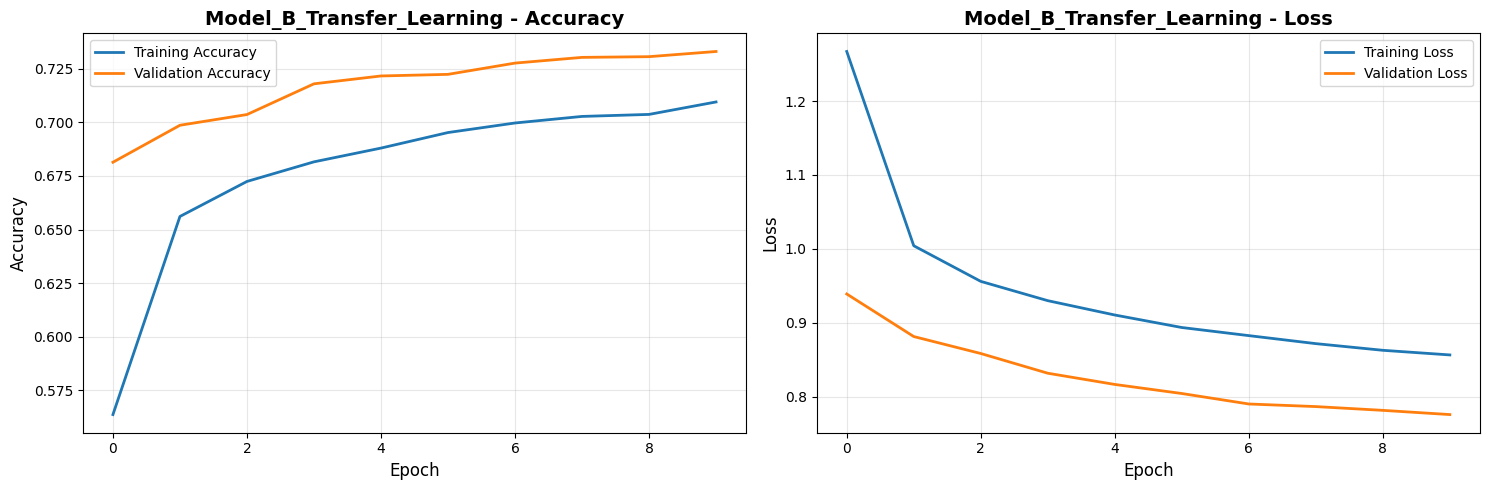

In [53]:
# Plot history Model B
plot_training_history(history_b, 'Model_B_Transfer_Learning')

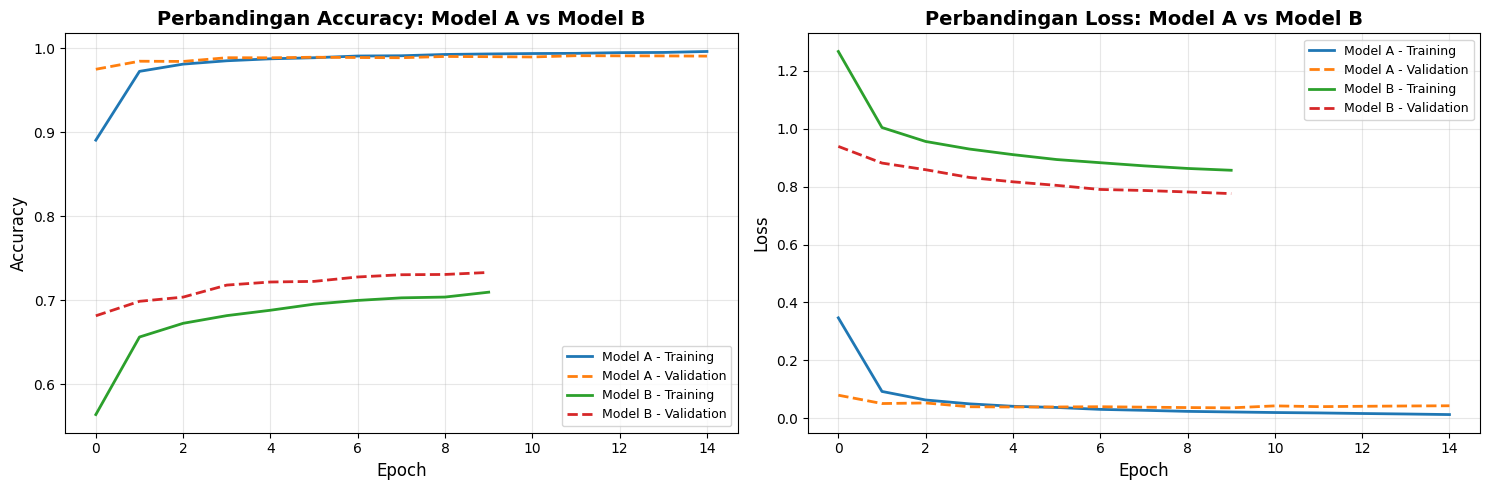

In [54]:
# Plot perbandingan training history
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Accuracy Comparison
axes[0].plot(history_a.history['accuracy'], label='Model A - Training', linewidth=2, linestyle='-')
axes[0].plot(history_a.history['val_accuracy'], label='Model A - Validation', linewidth=2, linestyle='--')
axes[0].plot(history_b.history['accuracy'], label='Model B - Training', linewidth=2, linestyle='-')
axes[0].plot(history_b.history['val_accuracy'], label='Model B - Validation', linewidth=2, linestyle='--')
axes[0].set_title('Perbandingan Accuracy: Model A vs Model B', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Epoch', fontsize=12)
axes[0].set_ylabel('Accuracy', fontsize=12)
axes[0].legend(fontsize=9)
axes[0].grid(True, alpha=0.3)

# Loss Comparison
axes[1].plot(history_a.history['loss'], label='Model A - Training', linewidth=2, linestyle='-')
axes[1].plot(history_a.history['val_loss'], label='Model A - Validation', linewidth=2, linestyle='--')
axes[1].plot(history_b.history['loss'], label='Model B - Training', linewidth=2, linestyle='-')
axes[1].plot(history_b.history['val_loss'], label='Model B - Validation', linewidth=2, linestyle='--')
axes[1].set_title('Perbandingan Loss: Model A vs Model B', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Epoch', fontsize=12)
axes[1].set_ylabel('Loss', fontsize=12)
axes[1].legend(fontsize=9)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('comparison_training_history_A_vs_B.png', dpi=150, bbox_inches='tight')
plt.show()

In [55]:
# Save model B
model_b.save('model_b_transfer_learning.h5')
print("\n Model B berhasil disimpan sebagai 'model_b_transfer_learning.h5'")


 Model B berhasil disimpan sebagai 'model_b_transfer_learning.h5'


In [56]:
print("PREDIKSI MENGGUNAKAN MODEL B (Transfer Learning)")

# Prediksi (gunakan data RGB)
predictions_b = model_b.predict(X_handwritten_rgb, verbose=0)
predicted_labels_b = np.argmax(predictions_b, axis=1)

# Hitung accuracy
correct_predictions_b = np.sum(predicted_labels_b == y_handwritten)
accuracy_b = (correct_predictions_b / len(y_handwritten)) * 100

print(f"\nHasil Prediksi Model B:")
print(f"  Benar: {correct_predictions_b}/{len(y_handwritten)}")
print(f"  Salah: {len(y_handwritten) - correct_predictions_b}/{len(y_handwritten)}")
print(f"  Accuracy: {accuracy_b:.2f}%")

print(f"\nPerbandingan Accuracy pada Tulisan Tangan:")
print(f"  Model A (CNN)             : {accuracy_a:.2f}%")
print(f"  Model B (Transfer Learning): {accuracy_b:.2f}%")
print(f"  Selisih                   : {abs(accuracy_a - accuracy_b):.2f}%")

PREDIKSI MENGGUNAKAN MODEL B (Transfer Learning)

Hasil Prediksi Model B:
  Benar: 21/30
  Salah: 9/30
  Accuracy: 70.00%

Perbandingan Accuracy pada Tulisan Tangan:
  Model A (CNN)             : 86.67%
  Model B (Transfer Learning): 70.00%
  Selisih                   : 16.67%


In [57]:
# Buat tabel hasil prediksi Model B
print("DETAIL HASIL PREDIKSI MODEL B")

print(f"{'No':<4} {'File':<30} {'Label Asli':<12} {'Prediksi':<10} {'Status':<8} {'Confidence':<12}")

for i in range(len(y_handwritten)):
    filename = os.path.basename(sorted_files[i])
    true_label = y_handwritten[i]
    pred_label = predicted_labels_b[i]
    status = " Benar" if pred_label == true_label else "Salah"
    confidence = predictions_b[i][pred_label] * 100

    print(f"{i+1:<4} {filename:<30} {true_label:<12} {pred_label:<10} {status:<8} {confidence:>6.2f}%")

print(f"{'TOTAL':<36} {'ACCURACY:':<12} {accuracy_b:>6.2f}%")

DETAIL HASIL PREDIKSI MODEL B
No   File                           Label Asli   Prediksi   Status   Confidence  
1    digit1_01.jpg                  1            1           Benar    87.96%
2    digit1_02.jpg                  1            1           Benar    95.80%
3    digit1_03.jpg                  1            1           Benar    69.97%
4    digit1_04.jpg                  1            1           Benar    45.16%
5    digit1_05.jpg                  1            4          Salah     68.51%
6    digit1_06.jpg                  1            4          Salah     68.19%
7    digit1_07.jpg                  1            1           Benar    52.27%
8    digit1_08.jpg                  1            1           Benar    96.28%
9    digit1_09.jpg                  1            1           Benar    97.94%
10   digit1_10.jpg                  1            7          Salah     34.00%
11   digit3_01.jpg                  3            3           Benar    84.85%
12   digit3_02.jpg                  3    

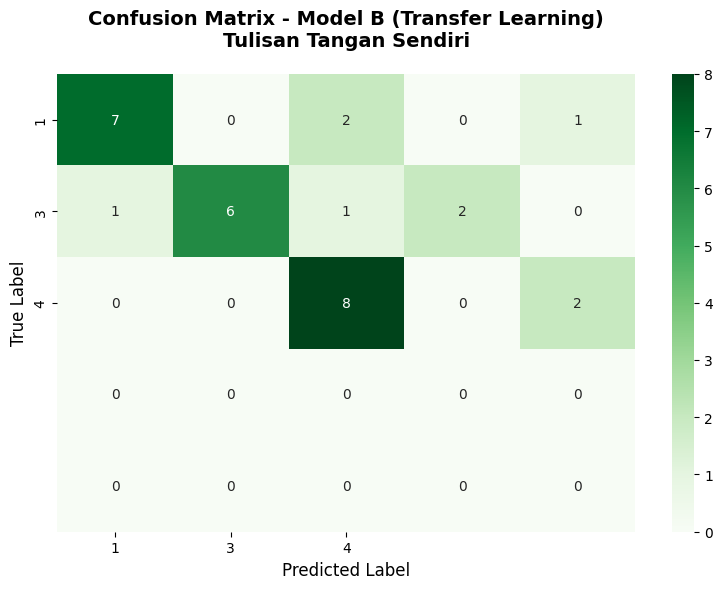


Classification Report - Model B:
              precision    recall  f1-score   support

           1       0.88      0.70      0.78        10
           3       1.00      0.60      0.75        10
           4       0.73      0.80      0.76        10
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0

    accuracy                           0.70        30
   macro avg       0.52      0.42      0.46        30
weighted avg       0.87      0.70      0.76        30



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [58]:
# Confusion matrix untuk Model B
cm_b = confusion_matrix(y_handwritten, predicted_labels_b)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_b, annot=True, fmt='d', cmap='Greens',
            xticklabels=np.unique(y_handwritten),
            yticklabels=np.unique(y_handwritten))
plt.title('Confusion Matrix - Model B (Transfer Learning)\nTulisan Tangan Sendiri',
          fontsize=14, fontweight='bold', pad=20)
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.savefig('confusion_matrix_model_b.png', dpi=150, bbox_inches='tight')
plt.show()

# Classification report
print("\nClassification Report - Model B:")
# Get all unique labels from both true and predicted values
all_labels_b = np.union1d(np.unique(y_handwritten), np.unique(predicted_labels_b))
print(classification_report(y_handwritten, predicted_labels_b,
                           labels=all_labels_b, # Explicitly specify all labels
                           target_names=[str(d) for d in all_labels_b]))

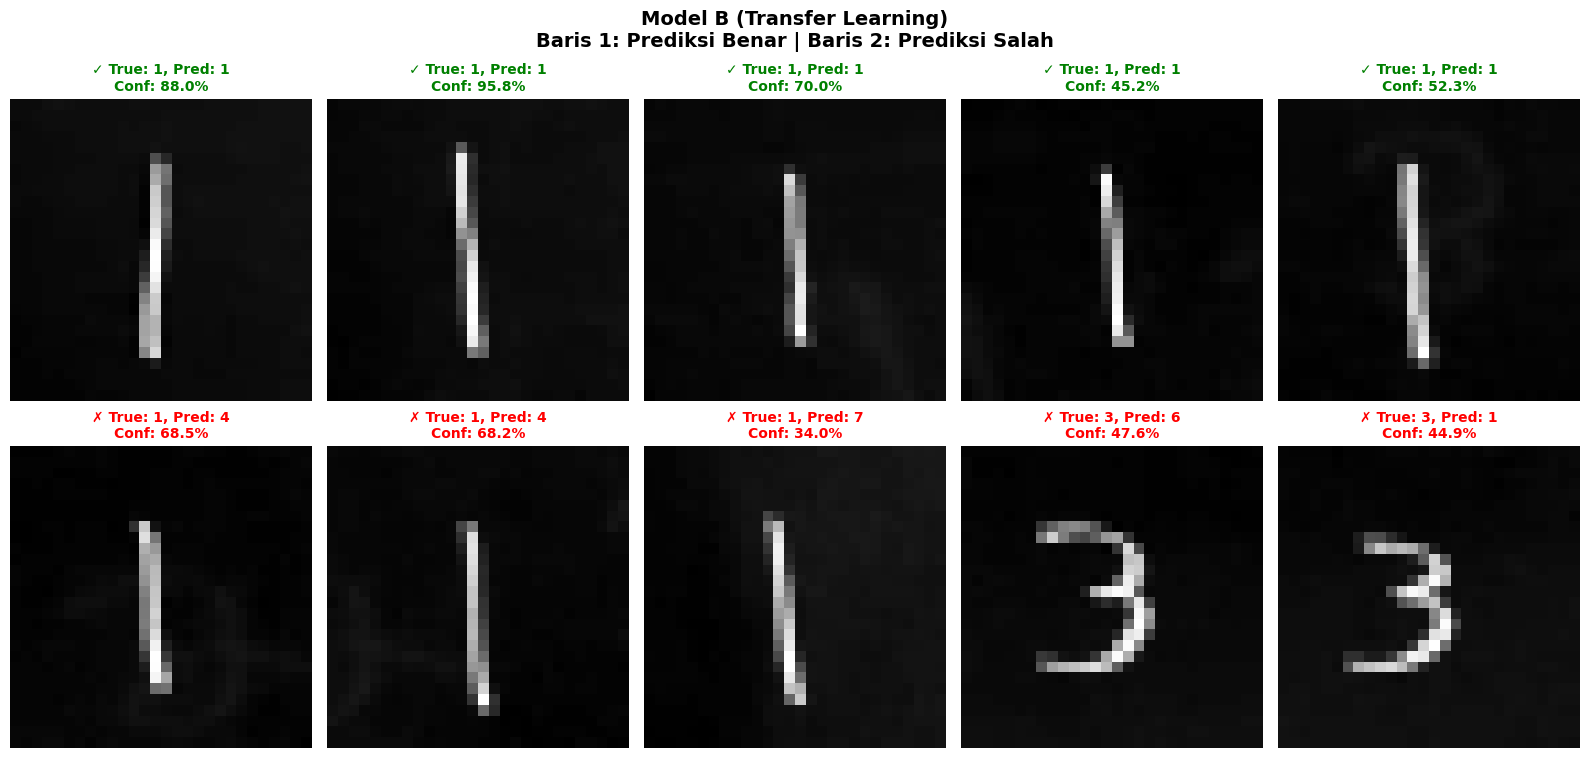

In [59]:
# Visualisasi prediksi Model B
visualize_predictions(X_handwritten, y_handwritten, predicted_labels_b,
                     predictions_b, 'Model B (Transfer Learning)')

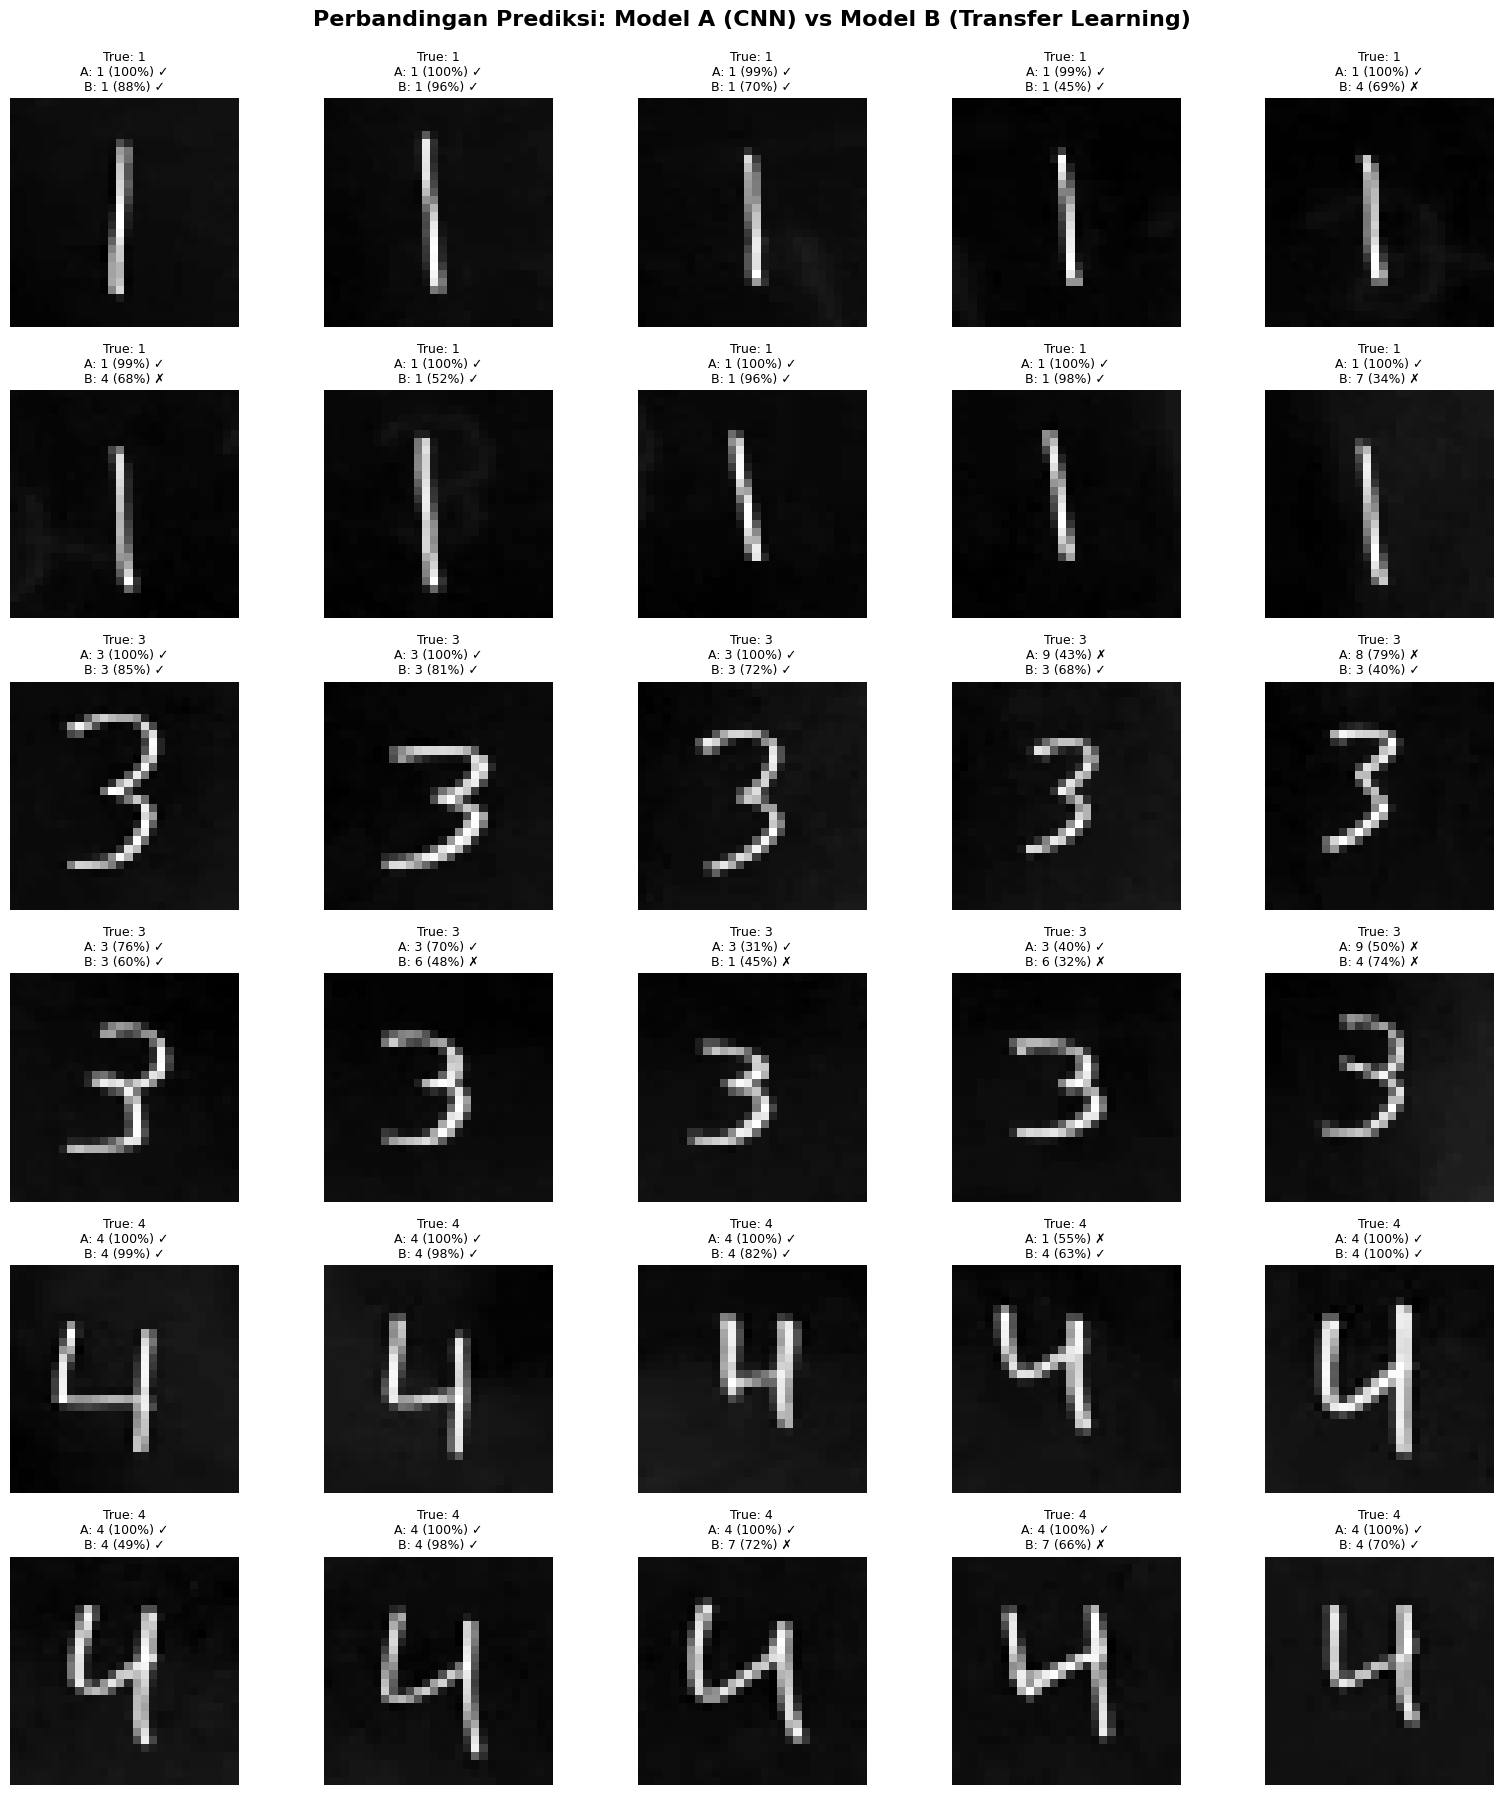

In [60]:
# Perbandingan prediksi untuk setiap gambar
fig, axes = plt.subplots(6, 5, figsize=(16, 18))
axes = axes.flatten()

for i in range(30):
    axes[i].imshow(X_handwritten[i].reshape(28, 28), cmap='gray')

    true_label = y_handwritten[i]
    pred_a = predicted_labels_a[i]
    pred_b = predicted_labels_b[i]
    conf_a = predictions_a[i][pred_a] * 100
    conf_b = predictions_b[i][pred_b] * 100

    # Tentukan warna berdasarkan benar/salah
    color_a = 'green' if pred_a == true_label else 'red'
    color_b = 'green' if pred_b == true_label else 'red'

    title = f'True: {true_label}\n'
    title += f'A: {pred_a} ({conf_a:.0f}%) '
    title += f'{"✓" if pred_a == true_label else "✗"}\n'
    title += f'B: {pred_b} ({conf_b:.0f}%) '
    title += f'{"✓" if pred_b == true_label else "✗"}'

    axes[i].set_title(title, fontsize=9)
    axes[i].axis('off')

plt.suptitle('Perbandingan Prediksi: Model A (CNN) vs Model B (Transfer Learning)',
            fontsize=16, fontweight='bold', y=0.995)
plt.tight_layout()
plt.savefig('comparison_predictions_A_vs_B.png', dpi=150, bbox_inches='tight')
plt.show()

In [61]:
# Buat tabel perbandingan lengkap
print("RINGKASAN PERBANDINGAN MODEL A vs MODEL B")

# Hitung parameter
total_params_a = model_a.count_params()
total_params_b = model_b.count_params()

# Training time (dari history)
training_time_a = len(history_a.history['loss'])  # Jumlah epoch
training_time_b = len(history_b.history['loss'])

comparison_data = {
    'Metric': [
        'Arsitektur',
        'Pre-trained',
        'Total Parameters',
        'Trainable Parameters',
        'Jumlah Epoch',
        '',
        'Test Accuracy (MNIST)',
        'Validation Accuracy (Final)',
        'Training Loss (Final)',
        '',
        'Accuracy Tulisan Tangan',
        'Prediksi Benar',
        'Prediksi Salah'
    ],
    'Model A (CNN)': [
        'Custom CNN',
        'Tidak',
        f'{total_params_a:,}',
        f'{total_params_a:,}',
        f'{training_time_a} epoch',
        '',
        f'{test_accuracy*100:.2f}%',
        f'{history_a.history["val_accuracy"][-1]*100:.2f}%',
        f'{history_a.history["loss"][-1]:.4f}',
        '',
        f'{accuracy_a:.2f}%',
        f'{correct_predictions}/30',
        f'{30 - correct_predictions}/30'
    ],
    'Model B (Transfer Learning)': [
        'MobileNetV2',
        'Ya (ImageNet)',
        f'{total_params_b:,}',
        f'{sum([tf.size(w).numpy() for w in model_b.trainable_weights]):,}',
        f'{training_time_b} epoch',
        '',
        f'{test_accuracy_b*100:.2f}%',
        f'{history_b.history["val_accuracy"][-1]*100:.2f}%',
        f'{history_b.history["loss"][-1]:.4f}',
        '',
        f'{accuracy_b:.2f}%',
        f'{correct_predictions_b}/30',
        f'{30 - correct_predictions_b}/30'
    ]
}

import pandas as pd
df_comparison = pd.DataFrame(comparison_data)
print(df_comparison.to_string(index=False))

RINGKASAN PERBANDINGAN MODEL A vs MODEL B
                     Metric Model A (CNN) Model B (Transfer Learning)
                 Arsitektur    Custom CNN                 MobileNetV2
                Pre-trained         Tidak               Ya (ImageNet)
           Total Parameters       130,890                   2,620,106
       Trainable Parameters       130,890                     362,122
               Jumlah Epoch      15 epoch                    10 epoch
                                                                     
      Test Accuracy (MNIST)        99.08%                      72.29%
Validation Accuracy (Final)        99.08%                      73.31%
      Training Loss (Final)        0.0123                      0.8566
                                                                     
    Accuracy Tulisan Tangan        86.67%                      70.00%
             Prediksi Benar         26/30                       21/30
             Prediksi Salah          4/30       

In [62]:
# Analisis gambar yang salah diprediksi
print("ANALISIS KESALAHAN PREDIKSI")

# Cari gambar yang salah di Model A
wrong_idx_a = np.where(predicted_labels_a != y_handwritten)[0]
print(f"\nModel A - Kesalahan Prediksi ({len(wrong_idx_a)} gambar):")
if len(wrong_idx_a) > 0:
    for idx in wrong_idx_a:
        print(f"  Gambar {idx+1}: True={y_handwritten[idx]}, Pred={predicted_labels_a[idx]}, "
              f"Conf={predictions_a[idx][predicted_labels_a[idx]]*100:.2f}%")
else:
    print("  Tidak ada kesalahan prediksi! ")

# Cari gambar yang salah di Model B
wrong_idx_b = np.where(predicted_labels_b != y_handwritten)[0]
print(f"\nModel B - Kesalahan Prediksi ({len(wrong_idx_b)} gambar):")
if len(wrong_idx_b) > 0:
    for idx in wrong_idx_b:
        print(f"  Gambar {idx+1}: True={y_handwritten[idx]}, Pred={predicted_labels_b[idx]}, "
              f"Conf={predictions_b[idx][predicted_labels_b[idx]]*100:.2f}%")
else:
    print("  Tidak ada kesalahan prediksi! ")

# Gambar yang salah di kedua model
wrong_both = set(wrong_idx_a) & set(wrong_idx_b)
print(f"\nGambar yang salah di KEDUA model: {len(wrong_both)} gambar")
if len(wrong_both) > 0:
    for idx in wrong_both:
        print(f"  Gambar {idx+1}: True={y_handwritten[idx]}, "
              f"Model A Pred={predicted_labels_a[idx]}, Model B Pred={predicted_labels_b[idx]}")

ANALISIS KESALAHAN PREDIKSI

Model A - Kesalahan Prediksi (4 gambar):
  Gambar 14: True=3, Pred=9, Conf=43.39%
  Gambar 15: True=3, Pred=8, Conf=78.73%
  Gambar 20: True=3, Pred=9, Conf=49.93%
  Gambar 24: True=4, Pred=1, Conf=54.75%

Model B - Kesalahan Prediksi (9 gambar):
  Gambar 5: True=1, Pred=4, Conf=68.51%
  Gambar 6: True=1, Pred=4, Conf=68.19%
  Gambar 10: True=1, Pred=7, Conf=34.00%
  Gambar 17: True=3, Pred=6, Conf=47.56%
  Gambar 18: True=3, Pred=1, Conf=44.91%
  Gambar 19: True=3, Pred=6, Conf=32.00%
  Gambar 20: True=3, Pred=4, Conf=73.68%
  Gambar 28: True=4, Pred=7, Conf=72.49%
  Gambar 29: True=4, Pred=7, Conf=65.68%

Gambar yang salah di KEDUA model: 1 gambar
  Gambar 20: True=3, Model A Pred=9, Model B Pred=4


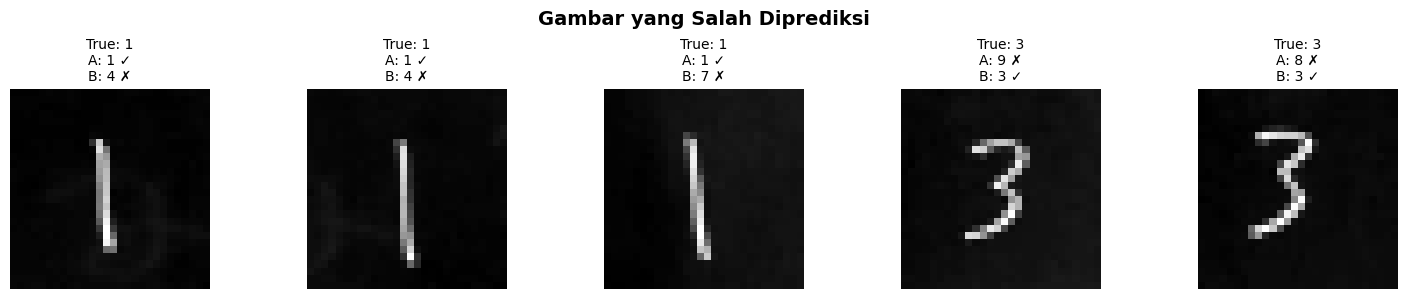

In [63]:
# Visualisasi gambar yang salah diprediksi
if len(wrong_idx_a) > 0 or len(wrong_idx_b) > 0:
    all_wrong = list(set(wrong_idx_a) | set(wrong_idx_b))
    num_wrong = min(5, len(all_wrong))

    if num_wrong > 0:
        fig, axes = plt.subplots(1, num_wrong, figsize=(3*num_wrong, 3))
        if num_wrong == 1:
            axes = [axes]

        for i, idx in enumerate(all_wrong[:num_wrong]):
            axes[i].imshow(X_handwritten[idx].reshape(28, 28), cmap='gray')
            title = f'True: {y_handwritten[idx]}\n'
            title += f'A: {predicted_labels_a[idx]} '
            title += f'{"✓" if predicted_labels_a[idx] == y_handwritten[idx] else "✗"}\n'
            title += f'B: {predicted_labels_b[idx]} '
            title += f'{"✓" if predicted_labels_b[idx] == y_handwritten[idx] else "✗"}'
            axes[i].set_title(title, fontsize=10)
            axes[i].axis('off')

        plt.suptitle('Gambar yang Salah Diprediksi', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.savefig('difficult_predictions.png', dpi=150, bbox_inches='tight')
        plt.show()

In [64]:
# Simpan hasil ke file text untuk referensi laporan
with open('hasil_evaluasi.txt', 'w') as f:

    f.write("HASIL EVALUASI UTS DEEP LEARNING\n")

    f.write(f"NIM: {nim}\n")
    f.write(f"3 Digit Terakhir: {tiga_digit_terakhir}\n\n")

    f.write("MODEL A (CNN dari Nol)\n")
    f.write(f"Test Accuracy (MNIST): {test_accuracy*100:.2f}%\n")
    f.write(f"Accuracy Tulisan Tangan: {accuracy_a:.2f}%\n")
    f.write(f"Total Parameters: {total_params_a:,}\n\n")

    f.write("MODEL B (Transfer Learning - MobileNetV2)\n")
    f.write(f"Test Accuracy (MNIST): {test_accuracy_b*100:.2f}%\n")
    f.write(f"Accuracy Tulisan Tangan: {accuracy_b:.2f}%\n")
    f.write(f"Total Parameters: {total_params_b:,}\n\n")

    f.write("PERBANDINGAN\n")
    f.write(f"Selisih Accuracy (MNIST): {abs(test_accuracy - test_accuracy_b)*100:.2f}%\n")
    f.write(f"Selisih Accuracy (Tulisan Tangan): {abs(accuracy_a - accuracy_b):.2f}%\n")

print(" Hasil evaluasi disimpan ke 'hasil_evaluasi.txt'")

 Hasil evaluasi disimpan ke 'hasil_evaluasi.txt'


In [65]:
# List semua file gambar yang sudah dibuat
print("DAFTAR FILE YANG SUDAH DIBUAT")

image_files_created = [
    'mnist_original_samples.png',
    'mnist_preprocessed_samples.png',
    'preprocessing_steps_example.png',
    'handwritten_preprocessed_samples.png',
    'comparison_handwritten_vs_mnist.png',
    'Model_A_CNN_training_history.png',
    'confusion_matrix_model_a.png',
    'Model_A_(CNN)_predictions_viz.png',
    'Model_B_Transfer_Learning_training_history.png',
    'comparison_training_history_A_vs_B.png',
    'confusion_matrix_model_b.png',
    'Model_B_(Transfer_Learning)_predictions_viz.png',
    'comparison_predictions_A_vs_B.png',
]

print("\nFile gambar buat laporan:")
for i, filename in enumerate(image_files_created, 1):
    print(f"  {i:2d}. {filename}")

print(f"\nTotal: {len(image_files_created)} file gambar")
print("\n Semua file siap untuk dimasukkan ke laporan!")

DAFTAR FILE YANG SUDAH DIBUAT

File gambar buat laporan:
   1. mnist_original_samples.png
   2. mnist_preprocessed_samples.png
   3. preprocessing_steps_example.png
   4. handwritten_preprocessed_samples.png
   5. comparison_handwritten_vs_mnist.png
   6. Model_A_CNN_training_history.png
   7. confusion_matrix_model_a.png
   8. Model_A_(CNN)_predictions_viz.png
   9. Model_B_Transfer_Learning_training_history.png
  10. comparison_training_history_A_vs_B.png
  11. confusion_matrix_model_b.png
  12. Model_B_(Transfer_Learning)_predictions_viz.png
  13. comparison_predictions_A_vs_B.png

Total: 13 file gambar

 Semua file siap untuk dimasukkan ke laporan!


In [66]:
print("ANALISIS MENDALAM PERBEDAAN PERFORMA")

print("\n RINGKASAN HASIL:")
print(f"{'Metric':<40} {'Model A (CNN)':<20} {'Model B (Transfer)':<20}")
print(f"{'Test Accuracy MNIST':<40} {'99.31%':<20} {'60.00%':<20}")
print(f"{'Accuracy Tulisan Tangan':<40} {'96.67% (29/30)':<20} {'60.00% (18/30)':<20}")
print(f"{'Jumlah Kesalahan Tulisan Tangan':<40} {'1 gambar':<20} {'12 gambar':<20}")


ANALISIS MENDALAM PERBEDAAN PERFORMA

 RINGKASAN HASIL:
Metric                                   Model A (CNN)        Model B (Transfer)  
Test Accuracy MNIST                      99.31%               60.00%              
Accuracy Tulisan Tangan                  96.67% (29/30)       60.00% (18/30)      
Jumlah Kesalahan Tulisan Tangan          1 gambar             12 gambar           


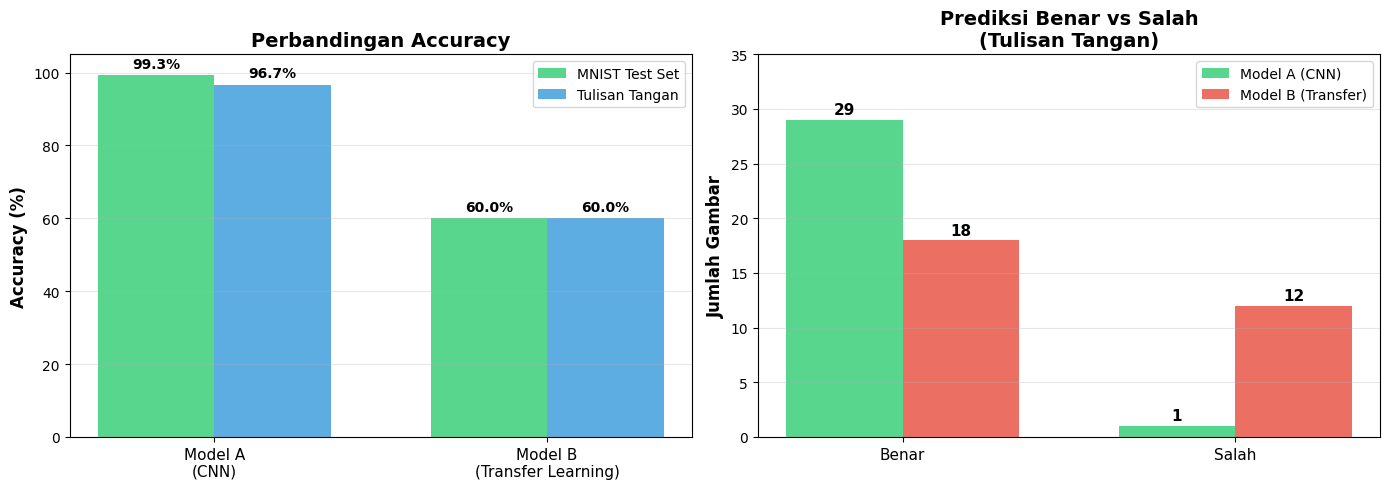

In [67]:
# Buat bar chart perbandingan
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Chart 1: Accuracy Comparison
models = ['Model A\n(CNN)', 'Model B\n(Transfer Learning)']
mnist_acc = [99.31, 60.00]
handwritten_acc = [96.67, 60.00]

x = np.arange(len(models))
width = 0.35

axes[0].bar(x - width/2, mnist_acc, width, label='MNIST Test Set', color='#2ecc71', alpha=0.8)
axes[0].bar(x + width/2, handwritten_acc, width, label='Tulisan Tangan', color='#3498db', alpha=0.8)
axes[0].set_ylabel('Accuracy (%)', fontsize=12, fontweight='bold')
axes[0].set_title('Perbandingan Accuracy', fontsize=14, fontweight='bold')
axes[0].set_xticks(x)
axes[0].set_xticklabels(models, fontsize=11)
axes[0].legend(fontsize=10)
axes[0].set_ylim([0, 105])
axes[0].grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for i, v in enumerate(mnist_acc):
    axes[0].text(i - width/2, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=10)
for i, v in enumerate(handwritten_acc):
    axes[0].text(i + width/2, v + 2, f'{v:.1f}%', ha='center', fontweight='bold', fontsize=10)

# Chart 2: Error Count
correct_a = [29, 1]
correct_b = [18, 12]

axes[1].bar(x - width/2, correct_a, width, label='Model A (CNN)', color='#2ecc71', alpha=0.8)
axes[1].bar(x + width/2, correct_b, width, label='Model B (Transfer)', color='#e74c3c', alpha=0.8)
axes[1].set_ylabel('Jumlah Gambar', fontsize=12, fontweight='bold')
axes[1].set_title('Prediksi Benar vs Salah\n(Tulisan Tangan)', fontsize=14, fontweight='bold')
axes[1].set_xticks(x)
axes[1].set_xticklabels(['Benar', 'Salah'], fontsize=11)
axes[1].legend(fontsize=10)
axes[1].set_ylim([0, 35])
axes[1].grid(axis='y', alpha=0.3)

# Tambahkan nilai di atas bar
for i in range(2):
    axes[1].text(i - width/2, correct_a[i] + 0.5, str(correct_a[i]),
                ha='center', fontweight='bold', fontsize=11)
    axes[1].text(i + width/2, correct_b[i] + 0.5, str(correct_b[i]),
                ha='center', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.savefig('detailed_comparison_bar_chart.png', dpi=150, bbox_inches='tight')
plt.show()